# Notebook description

This notebook looks at the SNR of a synapse with uniform input spike rate $\lambda$. [Here](http://nbviewer.ipython.org/github/fragapanagos/notebooks/blob/master/synapse/synapse_SNR_poisson.ipynb) is a notebook considering a synapse with Poisson input spikes and [here](http://nbviewer.ipython.org/github/fragapanagos/notebooks/blob/master/synapse/synapse_SNR_uniform.ipynb) is a notebook considering a synapse with $p$-thinned uniform input spikes.

$$SNR = \frac{E[x]}{\sqrt{\operatorname{Var}(x)}}.$$

The synapse with input spikes is a first order lowpass filter described by
$$\tau\dot{x}=-x+\sum_i\delta(t-t_i)$$

where $x$ is the synapse state and $t_i$ is the arrival time of the $i$th spike. [Here](http://nbviewer.ipython.org/github/fragapanagos/notebooks/blob/master/synapse/synapse_demo.ipynb) is a notebook demoing a synapse. Since the spikes are uniform, $t_i=\frac{i}{\lambda}$.

For a given offset in time within one period, $t_0$, the value of the synapse looking back in time is 

$$x=\sum_{i=0}^{\infty} \frac{1}{\tau}e^{-(t_i+t_0)/\tau}.$$

# Summary of findings

<div style="display:block; border: 1px solid black; padding: 15px;background-color: #EEEEFF;margin: 10px">
\begin{align}
E[x] &= \lambda \\
\end{align}

\begin{align}
\operatorname{Var}(x) &= \lambda^2\left(\frac{1}{2\lambda\tau}\coth\left(\frac{1}{2\lambda\tau}\right)-1\right) \\
\operatorname{Var}(x) &\approx \frac{1}{12\tau^2} \\
\end{align}

\begin{align}
SNR &= \frac{1}{\sqrt{\frac{1}{2\lambda\tau}\coth\left(\frac{1}{2\lambda\tau}\right)-1}} \\
SNR &\approx \sqrt{12}(\lambda\tau) & \text{at high }\lambda\tau\\
\end{align}

<br>
<p>
The steady state maximum and minimum values of the synapse are
</p>

\begin{align}
x_{ssmax} &= \frac{1}{\tau(1-e^{-1/\lambda\tau})} \\
x_{ssmin} &= \frac{e^{-1/\lambda\tau}}{\tau(1-e^{-1/\lambda\tau})} \\
\end{align}
</div>

# Derivations

If we consider $t_0\sim U[0, 1/\lambda]$, we can find $E[x]$, $\operatorname{Var}(x)$, and $SNR$.

Solving for $E[x]$,

\begin{align}
E[x] &= E\left[\sum_{i=0}^{\infty} \frac{1}{\tau}e^{-(t_i+t_0)/\tau}\right] \\
 &= \frac{1}{\tau}\sum_{i=0}^{\infty}e^{-t_i/\tau} E\left[e^{-t_0/\tau}\right] \\
 &= \frac{1}{\tau}\sum_{i=0}^{\infty}e^{-t_i/\tau} \int_0^{1/\lambda}\frac{1}{1/\lambda}e^{-t_0/\tau}dt_0 \\
 &= \lambda\frac{1}{\tau}\sum_{i=0}^{\infty}e^{-t_i/\tau} \left(-\tau\left[e^{-t_0/\tau}\right]_0^{1/\lambda}\right) \\
 &= \lambda\sum_{i=0}^{\infty}e^{-t_i/\tau} \left(1-e^{-1/\lambda\tau}\right) \\
 &= \lambda\left(1-e^{-1/\lambda\tau}\right)\sum_{i=0}^{\infty}\left(e^{-1/\lambda\tau}\right)^i  \\
 &= \lambda\left(1-e^{-1/\lambda\tau}\right)\frac{1}{1-e^{-1/\lambda\tau}}  \\
E[x] &= \lambda.
\end{align}

Solving for $E[x^2]$,

\begin{align}
E[x^2] &= E\left[\left(\sum_{i=0}^{\infty} \frac{1}{\tau}e^{-(t_i+t_0)/\tau}\right)^2\right] \\
 &= E\left[\left(\frac{1}{\tau}e^{-t_0/\tau}\sum_{i=0}^{\infty} e^{-t_i/\tau}\right)^2\right] \\
 &= E\left[\left(\frac{1}{\tau}e^{-t_0/\tau}\right)^2\left(\sum_{i=0}^{\infty} e^{-t_i/\tau}\right)^2\right] \\
 &= \frac{1}{\tau^2}E\left[\left(e^{-t_0/\tau}\right)^2\right]\left(\sum_{i=0}^{\infty} e^{-t_i/\tau}\right)^2 \\
 &= \frac{1}{\tau^2}E\left[e^{-2t_0/\tau}\right]\frac{1}{\left(1-e^{-1/\lambda\tau}\right)^2} \\
 &= \frac{1}{\tau^2}\frac{1}{\left(1-e^{-1/\lambda\tau}\right)^2}
    \lambda\int_0^{1/\lambda}e^{-2t_0/\tau}dt_0 \\
 &= \lambda\frac{1}{\tau^2}\frac{1}{\left(1-e^{-1/\lambda\tau}\right)^2}
    \left(-\frac{\tau}{2}\left[e^{-2t_0/\tau}\right]_0^{1/\lambda}\right) \\
 &= \lambda\frac{1}{2\tau}\frac{1}{\left(1-e^{-1/\lambda\tau}\right)^2}\left(1-e^{-2/\lambda\tau}\right) \\
 &= \lambda\frac{1}{2\tau}\frac{1}{\left(1-e^{-1/\lambda\tau}\right)^2}
    \left(1-e^{-1/\lambda\tau}\right)\left(1+e^{-1/\lambda\tau}\right) \\
 &= \frac{\lambda}{2\tau}\frac{1+e^{-1/\lambda\tau}}{1-e^{-1/\lambda\tau}}. \\
E[x^2] &= \frac{\lambda}{2\tau}\coth\left(\frac{1}{2\lambda\tau}\right). \\
\end{align}

Solving for $\operatorname{Var}(x)$,

\begin{align}
\operatorname{Var}(x) &= E[x^2]-E[x]^2 \\
 &=  \frac{\lambda}{2\tau}\coth\left(\frac{1}{2\lambda\tau}\right) - \lambda^2 \\
 &=  \lambda^2\left(\frac{1}{2\lambda\tau}\coth\left(\frac{1}{2\lambda\tau}\right) - 1\right) \\
 &=  \lambda^2\left(\frac{1}{2\lambda\tau}\coth\left(\frac{1}{2\lambda\tau}\right) - 1\right). \\
\end{align}


Taking the limit (with Mathematica), 

$$
\lim_{\lambda\rightarrow\infty}\operatorname{Var}(x) = \frac{1}{12\tau^2}.
$$

The $SNR$ is

\begin{align}
SNR &= \frac{E[x]}{\sqrt{\operatorname{Var}(x)}} \\
 &= \frac{\lambda}{\lambda\sqrt{
    \frac{1}{2\lambda\tau}\coth\left(\frac{1}{2\lambda\tau}\right)- 1}} \\
 &= \frac{1}{\sqrt{
    \frac{1}{2\lambda\tau}\coth\left(\frac{1}{2\lambda\tau}\right) - 1}}. \\
\end{align}

In the approximation of high $\lambda$,

$$
SNR \approx \sqrt{12}(\lambda\tau).
$$

However, we can do better than knowing the variance and SNR as we can solve for the steady state bounds on $x$ analytically. At steady state, the synapse traverses between a high value of $x_h$ and a low value of $x_l$ over $1/\lambda$ of time. Also since the synapse is in steady state, $x_u-x_l=1/\tau$ since each spike increments the synapse by $1/\tau$. Therefore,

\begin{align}
x_l &= x_he^{-1/\lambda\tau} \\
x_h - x_l &= \frac{1}{\tau} \\
\end{align}

so

\begin{align}
x_h - x_he^{-1/\lambda\tau} &= \frac{1}{\tau} \\
x_h(1 - e^{-1/\lambda\tau}) &= \frac{1}{\tau} \\
x_h &= \frac{1}{\tau(1 - e^{-1/\lambda\tau})} \\
\end{align}

and

$$
x_l = \frac{e^{-1/\lambda\tau}}{\tau(1 - e^{-1/\lambda\tau})}
$$

# Theoretical plots

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

s = np.random.seed(2)
rng = np.random.RandomState(s)

In [2]:
# theory functions
def th_mean(lam):
    return lam

def th_mean_sq(lam, tau):
    return lam/(2*tau)*(1+np.exp(-1/(lam*tau)))/(1-np.exp(-1/(lam*tau)))

def th_var(lam, tau):
    return lam**2*(1./(2.*lam*tau)*(1+np.exp(-1/(lam*tau)))/(1-np.exp(-1/(lam*tau)))-1)

def th_snr(lam, tau):
    return 1./np.sqrt(1./(2.*lam*tau)*(1+np.exp(-1/(lam*tau)))/(1-np.exp(-1/(lam*tau)))-1)

def lim_var(tau):
    return 1./(12.*tau**2)

def lim_snr(lam, tau):
    return np.sqrt(12)*lam*tau

def th_xmax(lam, tau):
    return 1./(tau*(1-np.exp(-1/(lam*tau))))

def th_xmin(lam, tau):
    return (np.exp(-1/(lam*tau)))/(tau*(1-np.exp(-1/(lam*tau))))

# simulation functions
def spike_value(t, tau):
    return 1./tau*np.exp(-t/tau)

def get_snr(mu, var):
    return mu/np.sqrt(var)

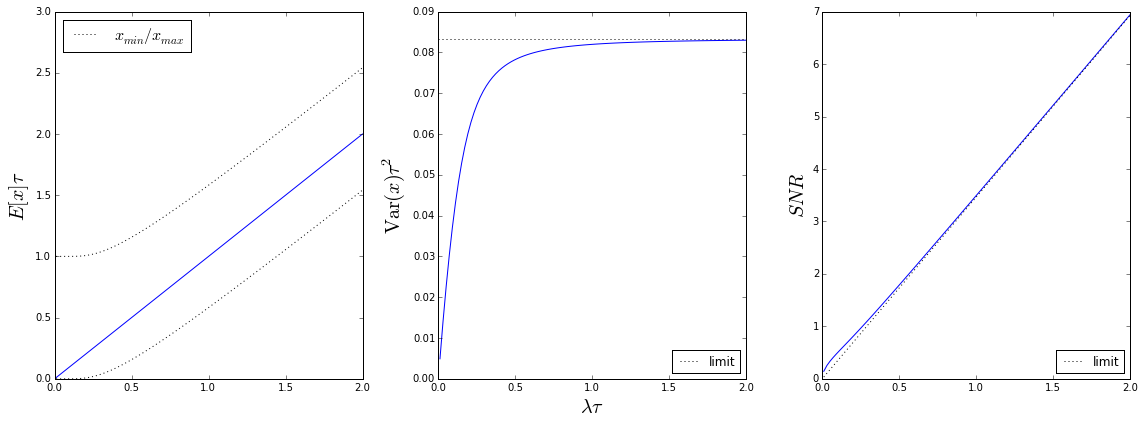

In [3]:
tau = .01
lam = np.linspace(1,200,100)
e_x = th_mean(lam)
x_max = th_xmax(lam, tau)
x_min = th_xmin(lam, tau)
var_x = th_var(lam, tau)
snr_x = th_snr(lam, tau)

fig = plt.figure(figsize=(16,6))
plt.subplot(131)
plt.plot(lam*tau, e_x*tau, 'b')
plt.plot(lam*tau, x_max*tau, 'k:', label='$x_{min}/x_{max}$')
plt.plot(lam*tau, x_min*tau, 'k:')
plt.legend(loc='upper left', fontsize=16)
plt.ylabel(r'$E[x]\tau$', fontsize=20)
plt.subplot(132)
plt.plot(lam*tau, var_x*tau**2, 'b')
plt.axhline(lim_var(tau)*tau**2, color='k', linestyle=':', label='limit')
plt.legend(loc='lower right')
plt.xlabel(r'$\lambda\tau$', fontsize=20);
plt.ylabel(r'$\operatorname{Var}(x)\tau^2$', fontsize=20)
plt.subplot(133)
plt.plot(lam*tau, snr_x, 'b')
plt.plot(lam*tau, lim_snr(lam, tau), 'k:', label='limit')
plt.legend(loc='lower right')
plt.ylabel(r'$SNR$', fontsize=20)
plt.tight_layout()

The plots suggest that the SNR of a synapse grows asymptotically linearly with the input rate for uniform spiking input. This is a better scaling than a synapse with Poisson spiking input, in which the SNR grows with the square root of the input rate.

Can we explain this with a first order expansion of the variance? No, in short, because the variance would go negative.

\begin{align}
\operatorname{Var}(x) &=  \lambda^2\left(\frac{1}{2\lambda\tau}\frac{1+e^{-1/\lambda\tau}}{1-e^{-1/\lambda\tau}} - 1\right) \\
 &\approx \lambda^2\left(\frac{1}{2\lambda\tau}\frac{1+(1-1/\lambda\tau)}{1-(1-1/\lambda\tau)} - 1\right) \\
 &= \lambda^2\left(\frac{1}{2\lambda\tau}\frac{2-1/\lambda\tau}{1/\lambda\tau} - 1\right) \\
 &= \lambda^2\left(\frac{1}{2}\left(2-\frac{1}{\lambda\tau}\right) - 1\right) \\
 &= \lambda^2-\frac{\lambda}{2\tau}-\lambda^2 \\
 &= -\frac{\lambda}{2\tau} \\
\end{align}

which is nonsensical because it is negative.

# Fixed Rate Simulation

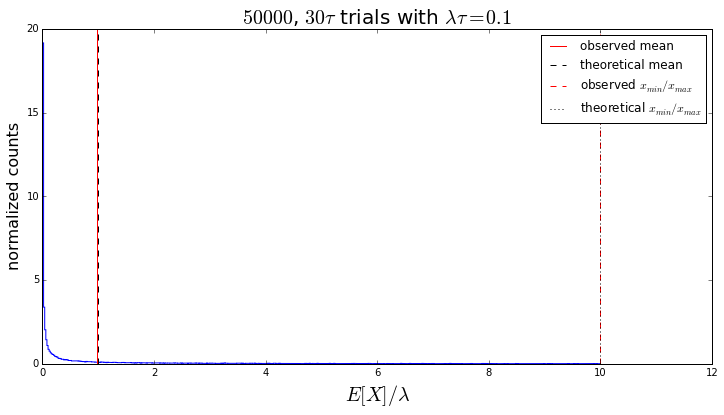

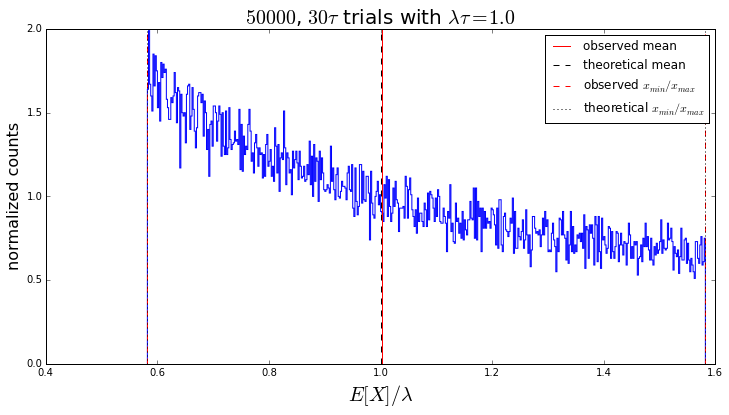

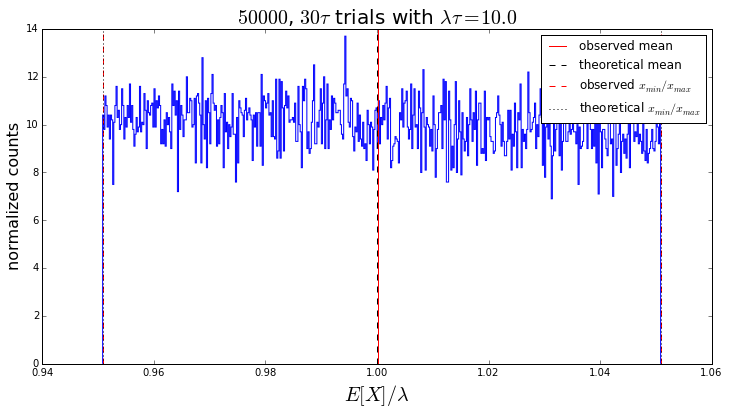

In [4]:
def sim_distribution(k=100., tau=.01, lam=1000., trials=4000):
    # k number of time constants to consider
    # tau time constant of the filter
    # lam frequency of spikes in
    nspikes = k*tau*lam

    shifts = rng.uniform(0, 1./lam, size=(trials))
    base_times = np.arange(nspikes)/lam
    spike_times = np.tile(base_times, (trials,1))
    for idx, shift in enumerate(shifts):
        spike_times[idx,:] +=  shift
    spike_vals = spike_value(spike_times, tau)
    Xs = np.sum(spike_vals, axis=1)
    
    fig=plt.figure(figsize=(12,6))
    ax=fig.add_subplot(111)
    ret=ax.hist(Xs/lam, bins=max(10, trials/100), normed=True, histtype='step')
    
    mean_obs = np.mean(Xs)
    mean_th = th_mean(lam)
    plt.axvline(mean_obs/lam, c='r', label='observed mean')
    plt.axvline(mean_th/lam, c='k', ls='--', label='theoretical mean')

    x_max_obs = max(Xs)
    x_min_obs = min(Xs)
    x_max_th = th_xmax(lam, tau)
    x_min_th = th_xmin(lam, tau)
    plt.axvline(x_max_obs/lam, c='r', ls='--', label=r'observed $x_{min}/x_{max}$')
    plt.axvline(x_min_obs/lam, c='r', ls='--')
    plt.axvline(x_max_th/lam, c='k', ls=':', label=r'theoretical $x_{min}/x_{max}$')
    plt.axvline(x_min_th/lam, c='k', ls=':')

    
    ax.set_title(r'$%d$, $%d\tau$ trials with $\lambda\tau=%.1f$' % (trials, k, lam*tau), fontsize=20)
    ax.set_ylabel('normalized counts', fontsize=16)
    ax.set_xlabel(r'$E[X]/\lambda$', fontsize=20)
    ax.legend(loc='upper right');

sim_distribution(k=30., tau=.01, lam=10., trials=50000)
sim_distribution(k=30., tau=.01, lam=100., trials=50000)
sim_distribution(k=30., tau=.01, lam=1000., trials=50000)

# Variable Rate Simulations

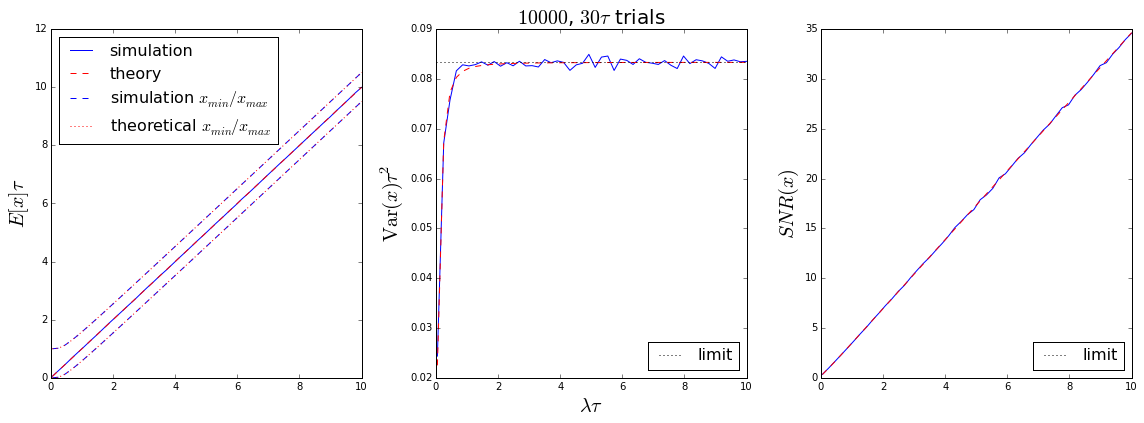

In [5]:
def check_theory(lams, k=30., tau=.01, trials=300):
    # lams array of frequencies to test
    # k number of time constants to consider in each experiment
    # tau time constant of the filter
    # lam frequency of spikes innexp = 300 # number of experiments
    nspikes = 1000 # number of spikes in each experiment
    nfreqs = len(lams) # number of frequencies to test

    obs_mean = np.zeros(nfreqs)
    obs_var = np.zeros(nfreqs)
    obs_snr = np.zeros(nfreqs)
    obs_xmax = np.zeros(nfreqs)
    obs_xmin = np.zeros(nfreqs)
    for lam_idx, lam in enumerate(lams):
        nspikes = k*tau*lam
        spike_times = np.arange(nspikes)/lam
        
        shifts = rng.uniform(0, 1./lam, size=(trials))
        exp_state = np.zeros(trials)
        for idx, shift in enumerate(shifts):
            exp_state[idx] = np.sum(spike_value(spike_times+shift, tau))
        obs_mean[lam_idx] = np.mean(exp_state)
        obs_var[lam_idx] = np.var(exp_state)
        obs_snr[lam_idx] = get_snr(obs_mean[lam_idx], obs_var[lam_idx])
        obs_xmax[lam_idx] = max(exp_state)
        obs_xmin[lam_idx] = min(exp_state)

    mean_th = th_mean(lams)
    var_th = th_var(lams, tau)
    snr_th = th_snr(lams, tau)

    xmax_th = th_xmax(lams, tau)
    xmin_th = th_xmin(lams, tau)
    
    plt.figure(figsize=(16,6))
    plt.subplot(131)
    plt.plot(lams*tau, obs_mean*tau, 'b', label='simulation')
    plt.plot(lams*tau, mean_th*tau, 'r--', label='theory')
    plt.plot(lams*tau, obs_xmax*tau, 'b--', label=r'simulation $x_{min}/x_{max}$')
    plt.plot(lams*tau, obs_xmin*tau, 'b--')
    plt.plot(lams*tau, xmax_th*tau, 'r:', label=r'theoretical $x_{min}/x_{max}$')
    plt.plot(lams*tau, xmin_th*tau, 'r:')
    plt.ylabel(r'$E[x]\tau$', fontsize=20)
    plt.legend(loc='upper left', fontsize=16)
    plt.subplot(132)
    plt.plot(lams*tau, obs_var*tau**2, 'b')
    plt.plot(lams*tau, var_th*tau**2, 'r--')
    plt.axhline(lim_var(tau)*tau**2, color='k', linestyle=':', label='limit')
    plt.title(r'$\tau=%.1f$ ms' % (tau*1000.), fontsize=20)
    plt.legend(loc='lower right', fontsize=16)
    plt.xlabel(r'$\lambda\tau$', fontsize=20)
    plt.ylabel(r'$\operatorname{Var}(x)\tau^2$', fontsize=20)
    plt.title(r'$%d$, $%d\tau$ trials' % (trials, k), fontsize=20)
    plt.subplot(133)
    plt.plot(lams*tau, obs_snr, 'b')
    plt.plot(lams*tau, snr_th, 'r--')
    plt.plot(lam*tau, lim_snr(lam, tau), 'k:', label='limit')
    plt.legend(loc='lower right', fontsize=16)
    plt.ylabel(r'$SNR(x)$', fontsize=20)
    plt.tight_layout()
    
lams = np.linspace(5, 1000, 50)
check_theory(lams, k=30, trials=10000)